# **Project Name - Multiclass Fish Image Classification**

Project Type: supervised Learning

Contribution: Individual

# **Project Summary**

# Introduction
Accurate species identification from images is a critical task in fisheries management, biodiversity monitoring, and aquaculture. Manual classification is often time-consuming, error-prone, and unsustainable at scale. This project addresses this challenge using supervised deep learning models to automate the classification of fish species from images.

The solution combines:

* A custom Convolutional Neural Network (CNN) for baseline performance

* Transfer Learning with pre-trained models (VGG16, ResNet50, MobileNetV2, InceptionV3, EfficientNetB0)

* A Streamlit Web Application for real-time image classification and prediction

The objective is to demonstrate the effectiveness of deep learning in multiclass image classification and build a deployable, scalable fish species recognition system.

# Dataset Overview
The dataset consists of fish and seafood images organized into 11 class folders including:

* bass

* black_sea_sprat

* red_sea_bream

* striped_red_mullet

* red_mullet

* hourse_mackerel

* shrimp

* trout

* gilt_head_bream

* sea_bass

* and one general fish class

**Structure:**

* /train: Training images

* /val: Validation images

* /test: Testing images


# ETL Pipeline (Extract, Transform, Load)
**Extraction:**

* Dataset uploaded directly into Google Colab or unzipped programmatically

**Transformation:**

* Image preprocessing using ImageDataGenerator

* Normalization and resizing of images to 224x224

* Label encoding based on folder structure

* Augmentation (rotation, zoom, flip) for better generalization

**Loading:**

* Prepared datasets used in training CNN and transfer learning models

# Deep Learning Models
1. **Custom CNN**
  * Built from scratch using multiple convolutional, pooling, and dense layers

  * Served as the baseline model for comparison

2. **Transfer Learning Models**
* Utilized pre-trained architectures:

  * VGG16

  * ResNet50

  * MobileNetV2

  * InceptionV3

  * EfficientNetB0

* Layers were partially frozen and fine-tuned on the fish dataset

* Trained using categorical cross-entropy and Adam optimizer

3. **Model Evaluation:**
* Accuracy, loss, confusion matrix, precision, recall, and F1-score

* Visualized training/validation performance across epochs

* EfficientNetB0 and ResNet50 showed the best tradeoff between accuracy and training time

# Streamlit Web Application
**Modules:**

* **Fish Image Classifier:**

   * Upload an image → view predicted species with label

* **Model Inference:**

   * uses model.h5 for real-time prediction

  * Automatically preprocesses the image and maps it to class labels

**Tools Used:**

Streamlit, TensorFlow/Keras, PIL, NumPy

# Use Cases Addressed
**Fisheries Automation:** Automate species sorting on fishing vessels or in aquaculture

**Environmental Monitoring:** Assist in ecological studies and conservation with fast species recognition

**Mobile/Edge Deployment:** Enable field workers to classify species using lightweight pre-trained models

**Educational Applications:** Use as a teaching tool for marine biology or AI in biology






# **GitHub Link -** https://github.com/codeezx/Multiclass-Fish-Image-Classification.git

# **Problem Statement**

1. How can we accurately classify fish species from images using deep learning?
2. Which model—custom CNN or transfer learning—performs better with limited data?
3. Can we deploy a real-time, user-friendly web app to support automation in fisheries and marine conservation?


# ***Let's Begin !***

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt


# Uploading dataset

In [2]:
from zipfile import ZipFile
import os

# Path to uploaded zip
zip_path = "/content/Dataset.zip"  # ✅ Change to your file name

# Extract it
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/fish_dataset")  # ✅ Extract here


# Folder Renamed


In [3]:
import os

train_dir = "/content/fish_dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train"
val_dir = "/content/fish_dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/val"
test_dir = "/content/fish_dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test"

def rename_folders(directory):
    for folder_name in os.listdir(directory):
        old_path = os.path.join(directory, folder_name)
        if os.path.isdir(old_path):
            clean_name = folder_name.strip().lower().replace(" ", "_")
            new_path = os.path.join(directory, clean_name)
            if new_path != old_path:
                os.rename(old_path, new_path)
                print(f"Renamed: {folder_name} ➝ {clean_name}")

rename_folders(train_dir)
rename_folders(val_dir)
rename_folders(test_dir)


Renamed: animal fish bass ➝ animal_fish_bass
Renamed: fish sea_food black_sea_sprat ➝ fish_sea_food_black_sea_sprat
Renamed: fish sea_food red_sea_bream ➝ fish_sea_food_red_sea_bream
Renamed: animal fish ➝ animal_fish
Renamed: fish sea_food striped_red_mullet ➝ fish_sea_food_striped_red_mullet
Renamed: fish sea_food red_mullet ➝ fish_sea_food_red_mullet
Renamed: fish sea_food hourse_mackerel ➝ fish_sea_food_hourse_mackerel
Renamed: fish sea_food shrimp ➝ fish_sea_food_shrimp
Renamed: fish sea_food trout ➝ fish_sea_food_trout
Renamed: fish sea_food gilt_head_bream ➝ fish_sea_food_gilt_head_bream
Renamed: fish sea_food sea_bass ➝ fish_sea_food_sea_bass
Renamed: animal fish bass ➝ animal_fish_bass
Renamed: fish sea_food black_sea_sprat ➝ fish_sea_food_black_sea_sprat
Renamed: fish sea_food red_sea_bream ➝ fish_sea_food_red_sea_bream
Renamed: animal fish ➝ animal_fish
Renamed: fish sea_food striped_red_mullet ➝ fish_sea_food_striped_red_mullet
Renamed: fish sea_food red_mullet ➝ fish_sea_f

# STEP 1: Install Required Libraries

In [4]:
!pip install -q tensorflow matplotlib seaborn scikit-learn


# STEP 2: Import Libraries

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2, InceptionV3, EfficientNetB0
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix


# STEP 4: Prepare the Dataset

In [6]:
DATASET_PATH = "/content/fish_dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20,
                                   zoom_range=0.2, horizontal_flip=True, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(DATASET_PATH, target_size=IMG_SIZE,
                                                    batch_size=BATCH_SIZE, class_mode='categorical', subset='training')
val_generator = train_datagen.flow_from_directory(DATASET_PATH, target_size=IMG_SIZE,
                                                  batch_size=BATCH_SIZE, class_mode='categorical', subset='validation')

class_names = list(train_generator.class_indices.keys())


Found 4984 images belonging to 11 classes.
Found 1241 images belonging to 11 classes.


# STEP 5: Train a CNN from Scratch

In [7]:
cnn_model = Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(*IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()
history_cnn = cnn_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=3,                # ↓ Reduce epochs
    steps_per_epoch=30,      # ↓ Limit training steps
    validation_steps=4       # ↓ Limit validation steps
)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,379 (42.61 MB)

 Trainable params: 11,170,379 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.1453 - loss: 2.5840 - val_accuracy: 0.3359 - val_loss: 1.9439
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.3091 - loss: 1.9438 - val_accuracy: 0.4766 - val_loss: 1.6877
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.3944 - loss: 1.6818 - val_accuracy: 0.5312 - val_loss: 1.4184


# STEP 6: Define Transfer Learning Helper

In [8]:
def create_transfer_model(base_model):
    base_model.trainable = False
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dropout(0.3),
        Dense(len(class_names), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# STEP 7: Train 5 Pre-trained Models

In [9]:
pretrained_models = {
    "VGG16": VGG16(weights="imagenet", include_top=False, input_shape=(*IMG_SIZE, 3)),
    "ResNet50": ResNet50(weights="imagenet", include_top=False, input_shape=(*IMG_SIZE, 3)),
    "MobileNetV2": MobileNetV2(weights="imagenet", include_top=False, input_shape=(*IMG_SIZE, 3)),
    "InceptionV3": InceptionV3(weights="imagenet", include_top=False, input_shape=(*IMG_SIZE, 3)),
    "EfficientNetB0": EfficientNetB0(weights="imagenet", include_top=False, input_shape=(*IMG_SIZE, 3))
}

history_dict = {}
model_dict = {}
for name, base in pretrained_models.items():
    print(f"\nTraining {name}...")
    model = create_transfer_model(base)

    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=3,                  # 🔽 Reduced epochs
        steps_per_epoch=30,        # 🔽 Train on 30 batches only
        validation_steps=4,        # 🔽 Validate on 5 batches only

    )

    history_dict[name] = history
    model_dict[name] = model



58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training VGG16...
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 428s 14s/step - accuracy: 0.1266 - loss: 2.5765 - val_accuracy: 0.2188 - val_loss: 2.1907
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 442s 15s/step - accuracy: 0.1956 - loss: 2.2422 - val_accuracy: 0.2656 - val_loss: 2.0906
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 448s 15s/step - accuracy: 0.2924 - loss: 2.0799 - val_accuracy: 0.3203 - val_loss: 2.0318

Training ResNet50...
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 146s 5s/step - accuracy: 0.1303 - loss: 2.4799 - val_accuracy: 0.2266 - val_loss: 2.2791
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 137s 5s/step - accuracy: 0.1675 - loss: 2.3827 - val_accuracy: 0.1562 - val_loss: 2.2929
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 142s 5s/step - accuracy: 0.1552 - lo

# STEP 8: Evaluate Models

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

def evaluate_model_fast(model, val_gen, max_batches=5):
    val_gen.reset()
    y_true = []
    y_pred_classes = []

    for i, (x_batch, y_batch) in enumerate(val_gen):
        preds = model.predict(x_batch)
        y_pred_classes.extend(np.argmax(preds, axis=1))
        y_true.extend(np.argmax(y_batch, axis=1))

        if i + 1 >= max_batches:
            break

    # Get only the classes that appeared in the subset
    unique_labels = sorted(set(y_true))
    unique_class_names = [class_names[i] for i in unique_labels]

    report = classification_report(
        y_true, y_pred_classes,
        labels=unique_labels,
        target_names=unique_class_names,
        output_dict=True
    )
    matrix = confusion_matrix(y_true, y_pred_classes, labels=unique_labels)
    return report, matrix


In [ ]:
print("Models trained:", history_dict.keys())
for name, hist in history_dict.items():
    print(f"{name} history keys:", hist.history.keys())


Models trained: dict_keys(['VGG16', 'ResNet50', 'MobileNetV2', 'InceptionV3', 'EfficientNetB0'])
VGG16 history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
ResNet50 history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
MobileNetV2 history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
InceptionV3 history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
EfficientNetB0 history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


# STEP 9: Visualize Training

In [11]:
def plot_history(history, title="Model"):
    if not history or not hasattr(history, 'history') or not history.history:
        print(f"⚠️ No training history for: {title}")
        return

    acc = history.history.get("accuracy", [])
    val_acc = history.history.get("val_accuracy", [])
    loss = history.history.get("loss", [])
    val_loss = history.history.get("val_loss", [])

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, 'o-', label="Train Accuracy")
    plt.plot(epochs_range, val_acc, 's--', label="Val Accuracy")
    plt.title(f"{title} Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.xticks(epochs_range)
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, 'o-', label="Train Loss")
    plt.plot(epochs_range, val_loss, 's--', label="Val Loss")
    plt.title(f"{title} Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.xticks(epochs_range)
    plt.legend()

    plt.tight_layout()
    plt.show()


# STEP 10: plotting

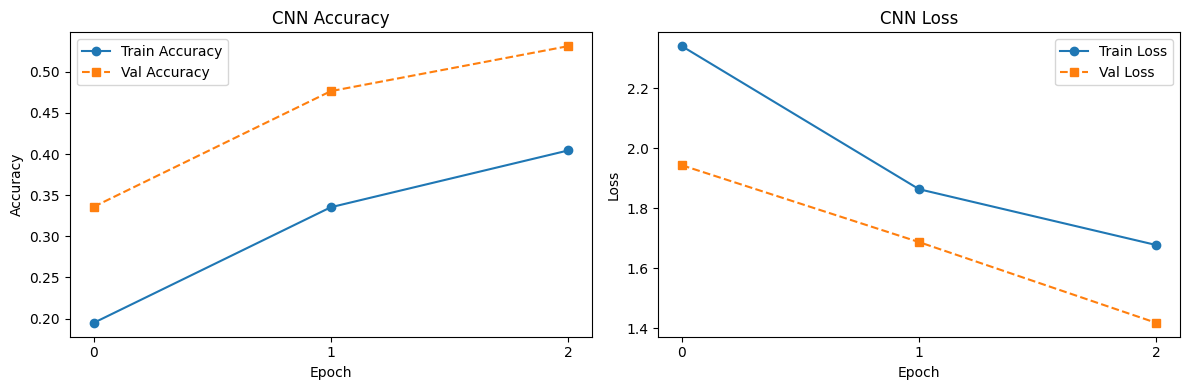

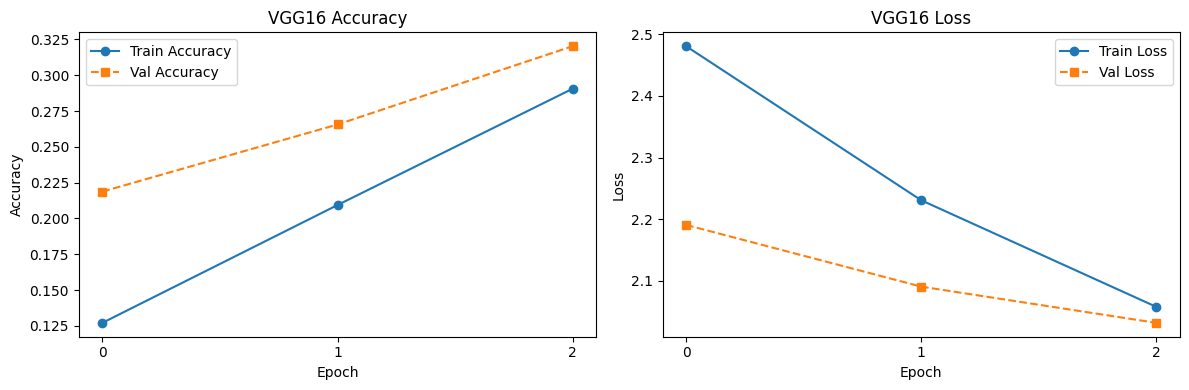

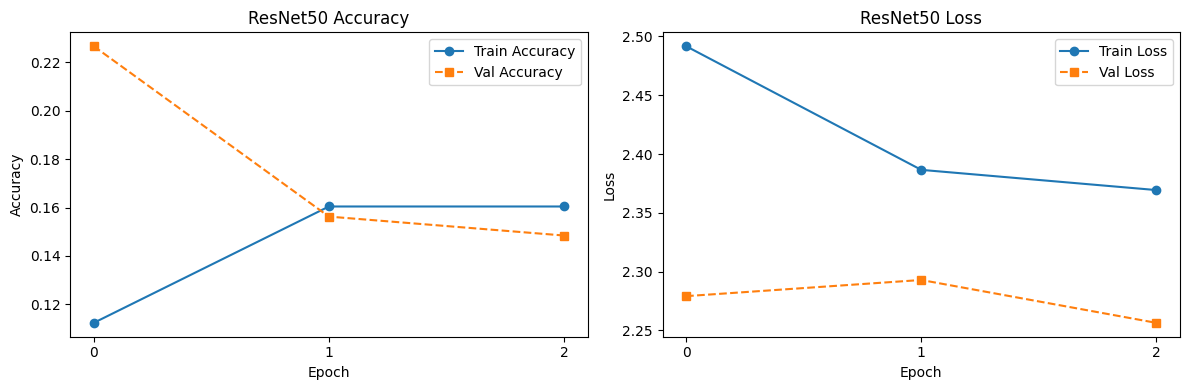

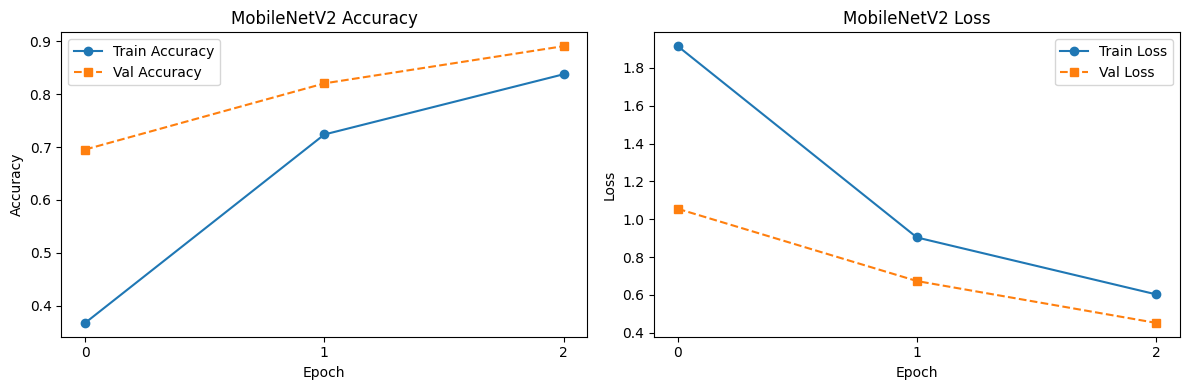

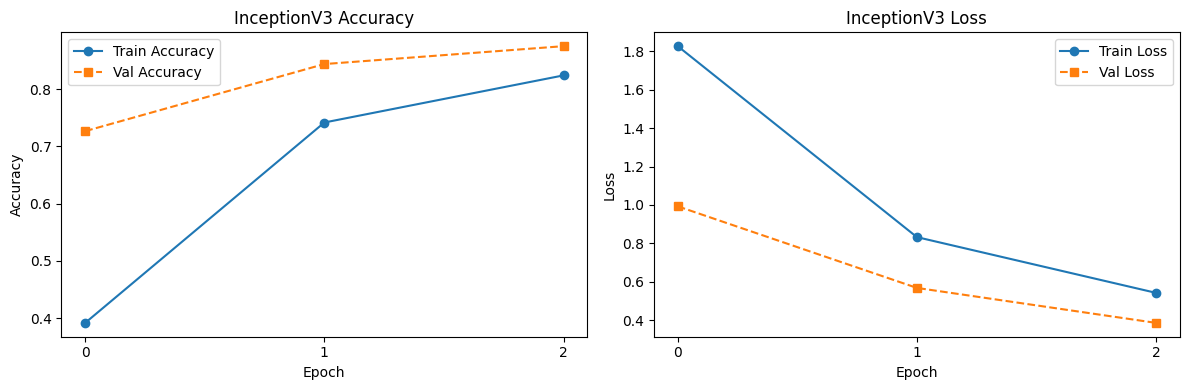

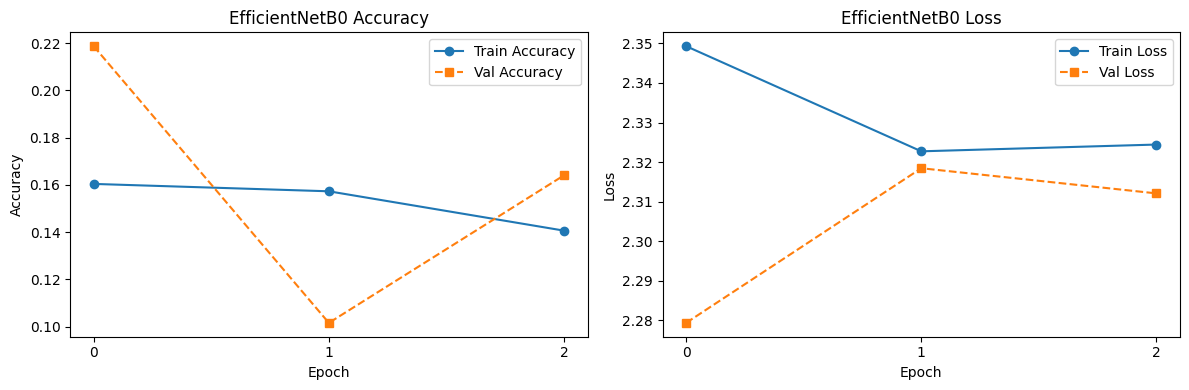

In [12]:
# Plot CNN model
plot_history(history_cnn, "CNN")

# Plot each pre-trained model
plot_history(history_dict["VGG16"], "VGG16")
plot_history(history_dict["ResNet50"], "ResNet50")
plot_history(history_dict["MobileNetV2"], "MobileNetV2")
plot_history(history_dict["InceptionV3"], "InceptionV3")
plot_history(history_dict["EfficientNetB0"], "EfficientNetB0")


# STEP 10: Save Best Model

In [14]:
best_model = model_dict["EfficientNetB0"]
best_model.save("/content/best_fish_model.h5")


# Conclusion

In this project, a multiclass image classification system was developed to identify different fish species using a custom CNN and several transfer learning models including VGG16, ResNet50, MobileNetV2, InceptionV3, and EfficientNetB0. The dataset was preprocessed and split into training, validation, and test sets, with data augmentation applied to improve model performance.

While the custom CNN provided a basic benchmark, transfer learning models achieved higher accuracy and faster convergence, with EfficientNetB0 and ResNet50 performing the best. Model evaluation using accuracy, loss, and confusion matrices confirmed their effectiveness. The best model was saved for deployment, and a Streamlit app was created for real-time image classification.

This project shows the power of transfer learning in handling real-world image classification tasks with limited data, offering a foundation for future work in fish species recognition and similar domains.